In [361]:
#### load packages, *.h5 folder and exp.h5 file location
%matplotlib widget

from essential_func import *
from analysis_data import *

qgrid2 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])

default_sample_dir = 'Mar-2023-Sample#1948'  #'July-sorted'  # '20-Dec' # 'July-2021-Sample#6'
csv_and_code_abs_directory = '/Users/bashit.a/Documents/Alzheimer/Codes/'
samples_csv = 'data_directory.csv'

dropdown_name, dropdown_name_list, cwd, exp_folder = change_python_path(dropdown_name = default_sample_dir, csv_file_location = csv_and_code_abs_directory, samples_csv = samples_csv)

Python directory is set to load samples from : Mar-2023-Sample#1948


In [3]:
#### GMM and t-SNE plot
%matplotlib widget

import functools

### figures output widgets
out1 = ipywidgets.Output()
out2 = ipywidgets.Output()

### GMM model
def train_GMM(X, n_components):
    from sklearn.mixture import GaussianMixture               # import package
    gaussian_model = GaussianMixture(n_components=n_components)          # define the model

    from sklearn import cluster
    #birch = cluster.Birch(n_clusters=n_components)

    gaussian_model.fit(X)                                     # train the model
    labels = gaussian_model.predict(X)                        # assign each data point to a cluster
    return labels

@out1.capture(clear_output=True, wait=True)
def unsupervised_map(file, labels, clusters):
    f1, ax1 = plt.subplots(num=1)
    plot_labels(file, labels, title='GMM', args = (f1, ax1), cmap = discrete_cmap( N= len(np.unique(labels)), base_cmap = 'brg') )   # discrete_cmap( N= len(np.unique(labels)), base_cmap = 'brg') 'Pastel1'

@out2.capture(clear_output=True, wait=True)
def manifold_plot(X, labels, perplexity, n_iter, animation):
    tsne_data = manifold_tsne(X, perplexity, n_iter, dim=3)
    print(animation)
    f2, ax2 = plt.subplots(num=2)
    plot_3d(tsne_data, labels, args = (f2,ax2), cmap = discrete_cmap( N= len(np.unique(labels)), base_cmap = 'brg'))  # discrete_cmap( N= len(np.unique(labels)), base_cmap = 'bwr')   'Pastel1'
    if animation: plot_3d_animation(tsne_data, labels, elev=35, azim=60, anim_frames=100, anim_interval=10)

def on_button_clicked_params():
    return dropdown.value, search_q.value, n_point.value, normalize.value, clusters.value, perplexity.value, n_iter.value, animation.value

def on_button_clicked(_):   # 

    ### get function arguments
    dropdown, search_q, n_point, normalize, clusters, perplexity, n_iter, animation = on_button_clicked_params()

    ### Data preprocessing
    q_min, q_max = search_q
    data = Data_Analysis(file = dropdown, qgrid=qgrid2, window_size=n_point, q_min=q_min, q_max=q_max, directory=os.getcwd())
    X = data.Iq

    ### Unsupervised model training and visualizing
    labels = train_GMM(X, n_components=clusters)
    labels = sort_labels(labels)
    unsupervised_map(dropdown, labels, clusters)
    manifold_plot(X, labels, perplexity, n_iter, animation)

### file selection and operation widgets  
files      = cwd_files_search_with('.h5')
dropdown   = ipywidgets.Dropdown(options= files, value = files[0], description='File : ', disabled=False)
search_q   = ipywidgets.FloatRangeSlider( value=(1.0, 2.0), min=qgrid2[0],   max=qgrid2[-1], step=0.0001,   description='q Range:',  disabled=False,  continuous_update=False,  layout=ipywidgets.Layout(width='40%'), orientation='horizontal',  readout=True, readout_format='.3f',)
n_point    = ipywidgets.IntSlider(value=4,                   min=1,         max=10, step=1, description='N-point : ', continuous_update=False, )
normalize  = ipywidgets.Checkbox(value=False, description='Normalize', disabled=False, indent=False )

### clustering and manifold widgets
clusters   = ipywidgets.IntSlider(value=4, min=1, max=20, step=1, description='clusters', continuous_update=False          )
perplexity = ipywidgets.IntSlider(value=30, min=10, max=1000, step=10, description='perplexity', continuous_update=False   )
n_iter     = ipywidgets.IntSlider(value=1000, min=500, max=10000, step=500, description='n_iter', continuous_update=False  )
button     = ipywidgets.Button(description='Go!');                                      button.style.button_color = "green";

button.on_click(on_button_clicked)

### animation object
animation  = ipywidgets.Checkbox(value=False, description='Animation', disabled=False, indent=False )

display(ipywidgets.HBox([dropdown, search_q  ]))
display(ipywidgets.HBox([n_point, normalize, animation ]))
display(ipywidgets.HBox([ipywidgets.VBox([clusters, perplexity, n_iter, button]), out1, out2]))

In [30]:
q_min, q_max = qgrid2[indices]
X = file_preprocess(file = dropdown.value, window_size=n_point.value, qgrid=qgrid2, q_min=q_min, q_max=q_max, normalize=normalize.value)

NameError: name 'indices' is not defined

In [32]:
### looking for zeros in the merged dataset
data = Data_Analysis(file = dropdown.value, qgrid=qgrid2, window_size=n_point.value, q_min=q_min, q_max=q_max, directory=os.getcwd())
X = data.Iq

def search_indices_for_non_zero(Iq):
    indices = []

    for i in range(0,Iq.shape[1],1):
        if np.sum(Iq[:,i])!=0:
            indices.append(i)
            break

    for i in range(Iq.shape[1]-1,0,-1):
        if np.sum(Iq[:,i])!=0:
            indices.append(i)
            break
    return indices
indices = search_indices_for_non_zero(Iq)

indices


NameError: name 'q_min' is not defined

In [31]:
### visualization
qgrid           = qgrid2
from sklearn import preprocessing
import plotly.express as px


data_input_w    = ipywidgets.RadioButtons(options=['all', 'trained', 'testing'],value='all')
preprocessing_w = ipywidgets.RadioButtons(options=['no_scaling', 'min_max', 'standard_scalar'],value='no_scaling')
plot_type_w     = ipywidgets.RadioButtons(options=['RAW-DATA', 'PCA'],value='RAW-DATA')
dimension_w     = ipywidgets.RadioButtons(options=['2D', '3D'],value='3D')
dim_1_w         = ipywidgets.SelectionSlider(options = qgrid, value = qgrid[50], orientation='vertical' , description='x-qgrid', continuous_update=False, style = {'description_width': 'initial'}, readout=True, readout_format='.2f',)
dim_2_w         = ipywidgets.SelectionSlider(options = qgrid, value = qgrid[100], orientation='vertical' , description='y-qgrid', continuous_update=False, style = {'description_width': 'initial'},readout=True, readout_format='.2f',)
dim_3_w         = ipywidgets.SelectionSlider(options = qgrid, value = qgrid[150], orientation='vertical' , description='z-qgrid', continuous_update=False, style = {'description_width': 'initial'},readout=True, readout_format='.2f',)
classifier_w    = ipywidgets.RadioButtons(options=['SVM', 'KMeans', 'Meanshift'],value='SVM')


min_max_scaler = preprocessing.MinMaxScaler()
scaler         = preprocessing.StandardScaler()

def plot_data_func(data_input_w, preprocessing_w, plot_type_w, dimension_w, dim_1_w ,dim_2_w ,dim_3_w ):

    q_indices =  np.array([qgrid_to_indices(qgrid, qvalue=qvalue) for qvalue in [dim_1_w ,dim_2_w ,dim_3_w]])
    print('{}'.format(qgrid[q_indices]))

    if data_input_w == 'all':

        if preprocessing_w == 'min_max':
            x1,y1,z1  = zip(*min_max_scaler.fit_transform(X[:,q_indices]))  
        elif preprocessing_w == 'standard_scalar':    
            x1,y1,z1  = zip(*scaler.fit_transform(X[:,q_indices]))  
        else:
            x1,y1,z1 = zip(*X[:,q_indices])

        if plot_type_w =='PCA': 
            x1,y1,z1 = zip(*pca.fit(X).transform(X))

    fig = px.scatter_3d(x=x1, y=y1, z=z1, template="plotly_white")  #  color=label1, symbol=pdb1, hover_name=twist1,
    fig.update_layout(
        autosize=True,
        width=1400,
        height=800,)
    fig.show()


plot_data = ipywidgets.interactive_output(plot_data_func, { 'data_input_w' : data_input_w    ,\
                                                            'preprocessing_w' : preprocessing_w ,\
                                                            'plot_type_w': plot_type_w,\
                                                            'dimension_w' : dimension_w     ,\
                                                            'dim_1_w' : dim_1_w         ,\
                                                            'dim_2_w' : dim_2_w         ,\
                                                            'dim_3_w' : dim_3_w     })

accordion_data            = ipywidgets.Accordion(children = [ipywidgets.VBox([ipywidgets.HBox([data_input_w, preprocessing_w, plot_type_w, dimension_w, dim_1_w, dim_2_w, dim_3_w, ]), plot_data])], titles   = ['Data'] )
accordion_classifier      = ipywidgets.Accordion(children = [classifier_w], titles   = ['Classifier'] )

tab = ipywidgets.Tab()
tab.children = [accordion_data, accordion_classifier]
tab.titles = ['1','4','3']

display(tab)

In [195]:
%matplotlib widget

X = [[0], [0.5], [1], [1.5], [2], [3]]
y = [0, 0, 0, 1, 1, 1]

neigh = KNeighborsClassifier(n_neighbors=3, p=2)
neigh.fit(X, y)

print(neigh.predict([[1.1], [0.9], [0.8]]))
print(neigh.predict_proba([[0.6]]))

[0 0 0]
[[1. 0.]]


In [25]:
#### annotations for K Neighbors Classifier, and visualizing in scatter plot - required neigh parameter to run
%matplotlib widget

### import packages
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px

### specs
file = '1898_V1-roi0_0_0_masked.h5'  # '1898_EC-roi0_0_0_masked_intp.h5'   '1898_V1-roi0_0_0_masked.h5'   '1898_V2-roi1_0_0_masked_intp.h5'
qvalue1 = 0.1
qvalue2 = 0.7
qvalue3 = 1.34

### get file information
Width, Height = width_height(file)
Iq   = read_Iq(file, scattering="merged")
labels = []

### label the training dataset
idxs  = []
label = 0    # bkg labels
for idx in [np.arange(122,129), np.arange(241, 255), np.arange(365,378), np.arange(490, 502), np.arange(614, 626), np.arange(738, 750), np.arange(862, 874), np.arange(986, 995), np.arange(1114, 1116)]:
    idxs.append([i for i in idx])
    labels.append(len(idx)*[label])

label = 1    # tissue labels
for idx in [np.arange(1000, 1009), np.arange(1304, 1339), np.arange(683, 709), np.arange(3113, 3154), np.arange(3391, 3412), ]:
    idxs.append([i for i in idx])
    labels.append(len(idx)*[label])

idxs   = np.asarray(flatten(idxs), dtype=int)
labels = np.array(flatten(labels))

### Index training X data, and cast y as an array
Iq_train = Iq[idxs]
X_full  = Iq[:, [ qgrid_to_indices(qgrid2, qvalue1), qgrid_to_indices(qgrid2, qvalue2), qgrid_to_indices(qgrid2, qvalue3)] ]
X_train = X_full[idxs]
y_train = np.asarray(labels, dtype=int)

### scaling data
# scaler         = preprocessing.StandardScaler()
# X_train        = scaler.fit_transform(X_train)

### train model
neigh = KNeighborsClassifier(n_neighbors = 5, p = 2, algorithm='brute')
neigh.fit(X_train, y_train)

### Visualize labeled data
fig = px.scatter_3d(x=X_train[:, 0] , y=X_train[:, 1] , z=X_train[:, 2] ,
                    color=labels, symbol=labels,  hover_name= idxs,  template="plotly_white")
fig.update_layout(
    autosize=True,
    width=1400,
    height=800,
    scene=dict(
        xaxis_title=f'q={qvalue1 }',
        yaxis_title=f'q={qvalue2 }',
        zaxis_title=f'q={qvalue3 }',
    )
)
fig.show()

FileNotFoundError: [Errno 2] No such file or directory

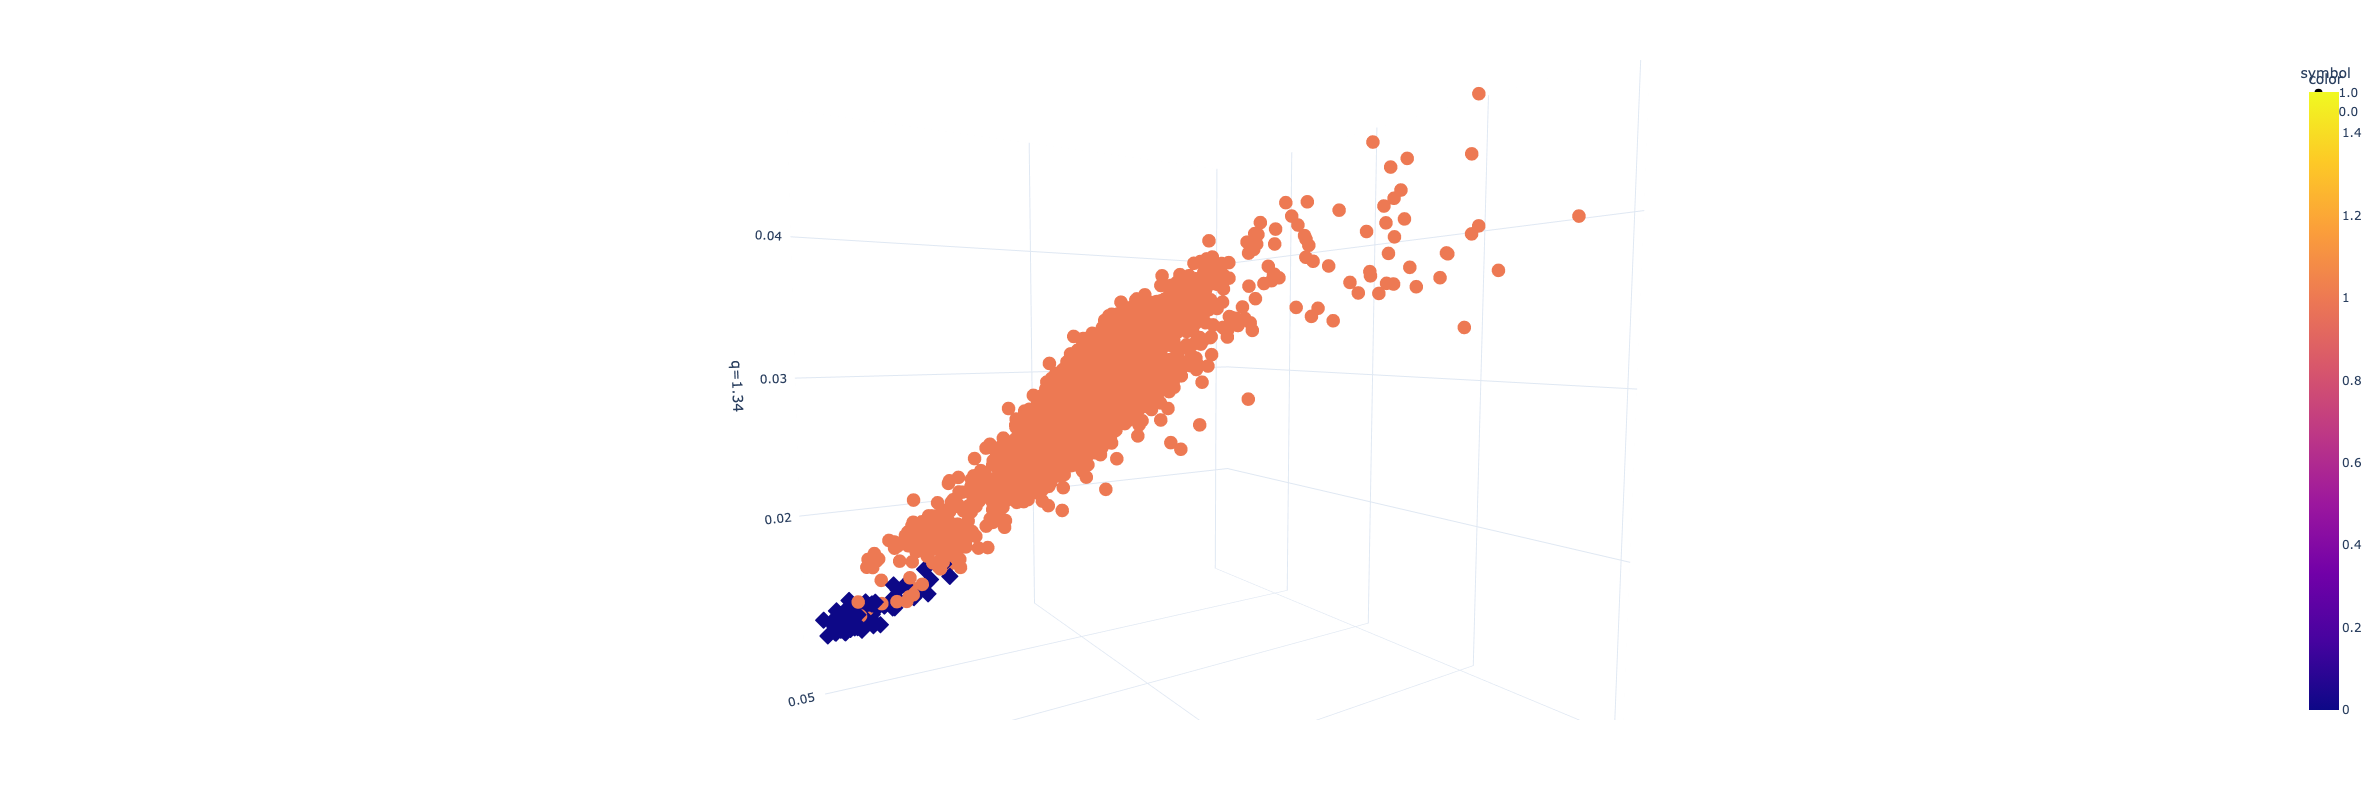

In [5]:
### visualization - Annotated as mica scattering vs not mica 
%matplotlib widget

### specs
y_full  = np.ones(Width*Height)
y_train_zero_idxs = idxs[labels == 0] 
y_full [ y_train_zero_idxs ] = 0

### plot data
fig = px.scatter_3d(x=X_full[:, 0] , y=X_full[:, 1] , z=X_full[:, 2] , 
                    color=y_full, symbol=y_full,  hover_name= np.arange(0,Width*Height),  template="plotly_white")
fig.update_layout(
    autosize=True,
    width=1400,
    height=800,
    scene=dict(
        xaxis_title=f'q={qvalue1 }',
        yaxis_title=f'q={qvalue2 }',
        zaxis_title=f'q={qvalue3 }',
    )
)
fig.show()

In [24]:
# idxs  = []

# for idx in [np.arange(1000, 1009), np.arange(1304, 1339), np.arange(683, 709), np.arange(3113, 3154), np.arange(3391, 3412), ]:
#     idxs.append([i for i in idx])
# print(flatten(idxs    ))
print(FN.tolist())

[2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 305

Text(0.5, 0.98, '1971_EC-roi1_0_0_masked.h5')

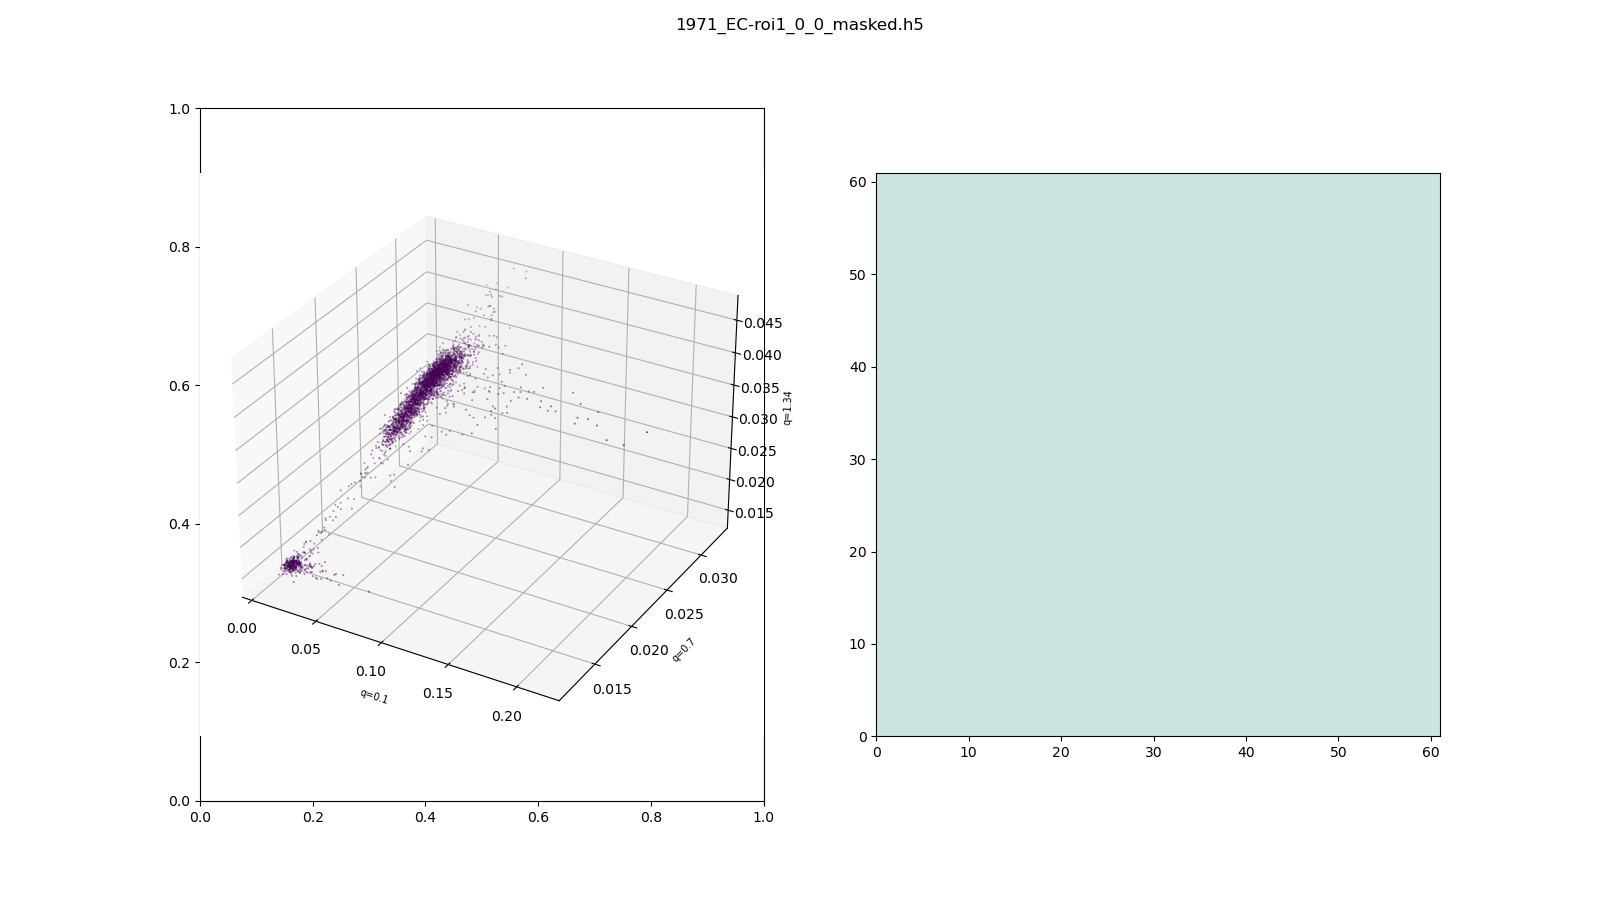

In [18]:
### KNN classifier outcome
%matplotlib widget

### specs - import file
file      = '1971_EC-roi1_0_0_masked.h5'    # '1898_EC-roi0_0_0_masked_intp.h5'   '1898_V1-roi0_0_0_masked.h5'   '1898_V2-roi1_0_0_masked_intp.h5'
directory = '/Volumes/HDD/BNL-Data/Mar-2023/1971/'
Width, Height = width_height(file, directory = directory)
Iq        = read_Iq(file, scattering="merged", directory = directory)

### computation
yhat = []
for frame in range(Width*Height):
    a = neigh.predict_proba(Iq[frame, [qgrid_to_indices(qgrid2, qvalue1), qgrid_to_indices(qgrid2, qvalue2), qgrid_to_indices(qgrid2, qvalue3)] ].reshape(1, -1))
    yhat.append( a.argmax() )
yhat = np.asarray(yhat, dtype=int)
# yhat = neigh.predict( Iq[:, [ qgrid_to_indices(qgrid2, qvalue1), qgrid_to_indices(qgrid2, qvalue2), qgrid_to_indices(qgrid2, qvalue3)] ] )   # Iq[:, [ qgrid_to_indices(qgrid2, qvalue1), qgrid_to_indices(qgrid2, qvalue2), qgrid_to_indices(qgrid2, qvalue3)] ]


### Visualize labeled data
fig = px.scatter_3d(x = Iq[:, qgrid_to_indices(qgrid2, qvalue1)], y= Iq[:, qgrid_to_indices(qgrid2, qvalue2) ], z= Iq[:, qgrid_to_indices(qgrid2, qvalue3)]  ,
                    color=yhat, symbol=yhat,  hover_name= np.arange(0,Width*Height),  template="plotly_white")  # x = Iq[:, qgrid_to_indices(qgrid2, qvalue1)], y= Iq[:, qgrid_to_indices(qgrid2, qvalue2) ], z= Iq[:, qgrid_to_indices(qgrid2, qvalue3)]   hover_name= None,  symbol=yhat,  symbol=yhat, hover_name= np.arange(0,Width*Height),
fig.update_layout(
    autosize=True,
    width=1400,
    height=800,
    scene=dict(
        xaxis_title=f'q={qvalue1 }',
        yaxis_title=f'q={qvalue2 }',
        zaxis_title=f'q={qvalue3 }',
    )
)

### plot figure
f, axs    = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 9 ))
axs[0]  = f.add_subplot(1, 2, 1, projection='3d')
axs[0].scatter3D (xs = Iq[:, qgrid_to_indices(qgrid2, qvalue1)], ys= Iq[:, qgrid_to_indices(qgrid2, qvalue2) ], zs= Iq[:, qgrid_to_indices(qgrid2, qvalue3)]  , c =yhat, marker ='.', s=0.5)
axs[0].set_xlabel(f'q={qvalue1 }',  fontsize=7)
axs[0].set_ylabel(f'q={qvalue2 }',  fontsize=7)
axs[0].set_zlabel(f'q={qvalue3 }',  fontsize=7)


frame_cor = snaking(Width, Height)                   # snaking indices for heat map,
numrows, numcols = Height, Width                     # format_coord function requires this global variables
def format_coord(x, y):
    col = int(x)                                     # truncate x values
    row = int(y)                                     # truncate y values
    if 0 <= col < numcols and 0 <= row < numrows:
        z = np.flipud(frame_cor)[row, col]           # flipping to get correct value of z     
        return 'x=%1.2f, y=%1.2f, FRAME=%d' % (x, y, z)
    else:
        return 'x=%1.2f, y=%1.2f' % (x, y)           # outside the plotting range, no need



axs[1].format_coord = format_coord
img_orig            = snaking(Width, Height, X=yhat)
axs[1].imshow(img_orig, cmap='summer' , interpolation = 'none', origin='upper', extent=[0,Width,0,Height], aspect='equal', norm=None, alpha=0.2)


plt.suptitle(file)

False Negative Frames: [2190 2191 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201 2202 2203
 2204 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318 2319 2320
 2321 2322 2323 2324 2325 2326 2327 2328 2429 2430 2431 2432 2433 2434
 2435 2436 2437 2438 2439 2440 2441 2442 2443 2444 2445 2446 2447 2448
 2449 2450 2451 2549 2550 2551 2552 2553 2554 2555 2556 2557 2558 2559
 2560 2561 2562 2563 2564 2565 2566 2567 2568 2569 2570 2571 2572 2573
 2574 2575 2670 2671 2672 2673 2674 2675 2676 2677 2678 2679 2680 2681
 2682 2683 2684 2685 2686 2687 2688 2689 2690 2691 2692 2693 2694 2695
 2696 2795 2796 2797 2798 2799 2800 2801 2802 2803 2804 2805 2806 2807
 2808 2809 2810 2811 2812 2813 2814 2815 2816 2918 2919 2920 2921 2922
 2923 2924 2925 2926 2927 2928 2929 2930 2931 2932 2933 2934 2935 2936
 2937 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052
 3053 3054 3055 3056 3057 3058 3059 3060 3158 3159 3160 3161 3162 3163
 3164 3165 3166 3167 3168 3169 3170 3171 3172 3173 317

Text(0.5, 0.98, '1971_EC-roi1_0_0_masked.h5')

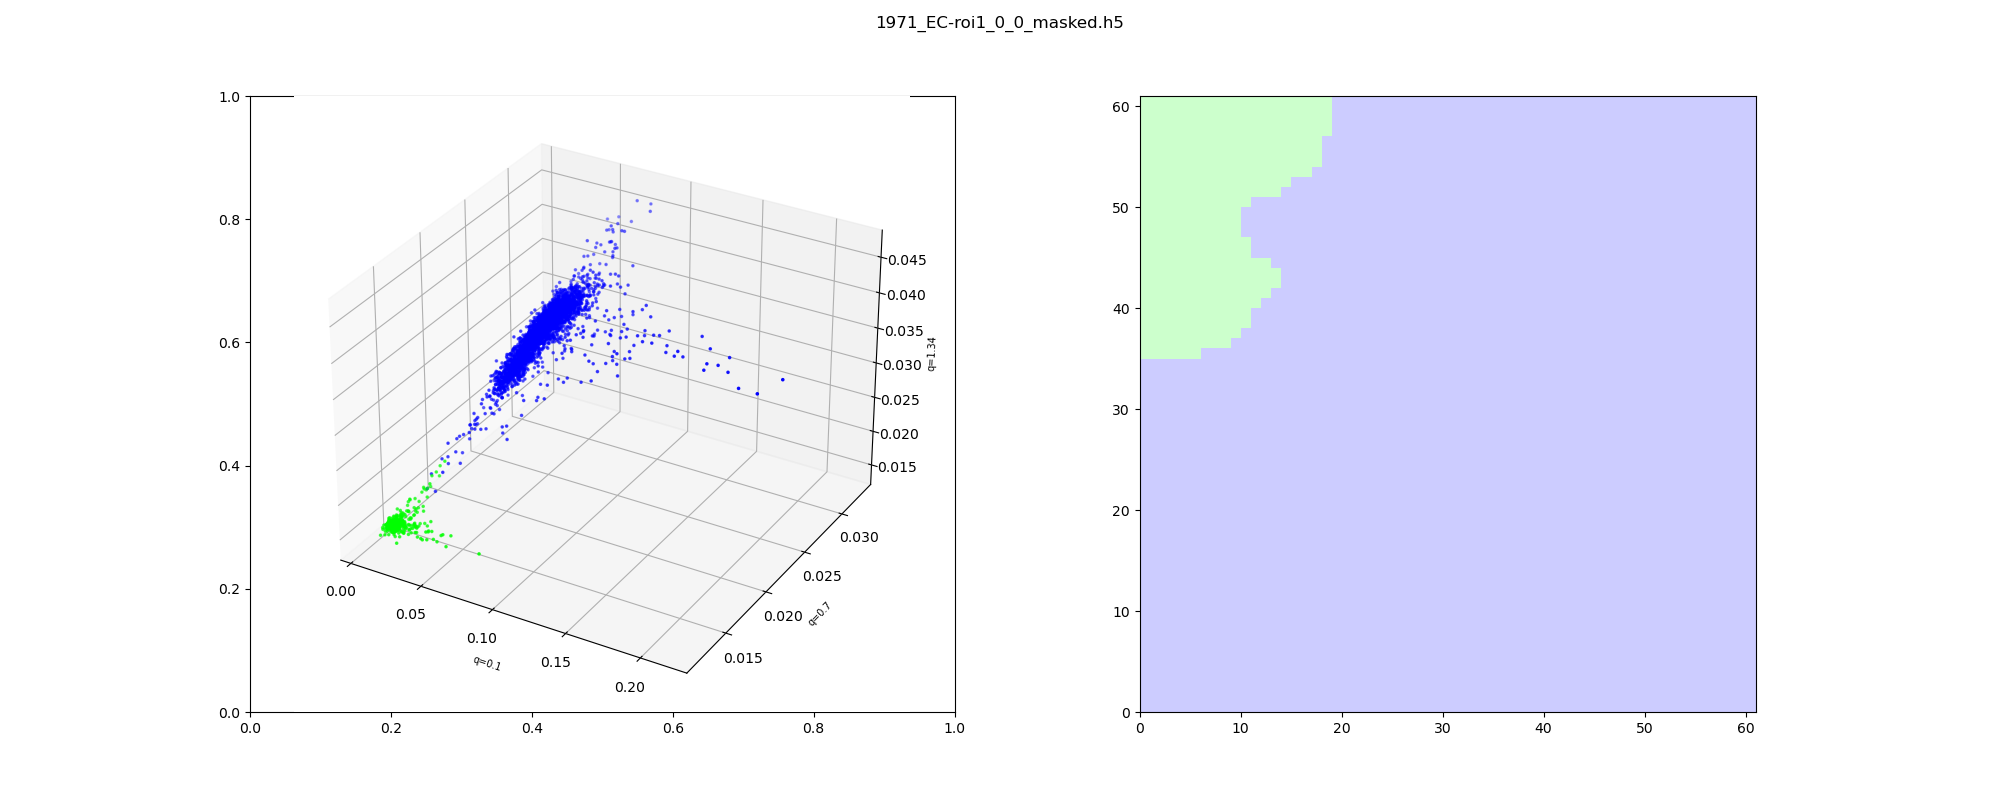

In [7]:
%matplotlib widget

### 1971 EC - ROI-1
y_true = []
for frames in [np.arange(2190, 2205), np.arange(2308, 2329), np.arange(2429, 2452), np.arange(2549, 2576), np.arange(2670, 2697), np.arange(2795, 2817), np.arange(2918, 2938), np.arange(3040, 3061), np.arange(3158, 3187), np.arange(3277, 3312), np.arange(3398, 3434), np.arange(3519, 3557), np.arange(3641, 3679),] :
    for frame in frames:
        y_true.append(frame)

y_true = np.array(y_true)
yhat_frames = np.array( np.where(yhat == 0)[0].tolist() )

TP = np.intersect1d(y_true , yhat_frames)
FN = np.setdiff1d ( y_true,  TP )   #
print('False Negative Frames:', FN )

accuracy = len(TP)/(len(TP)+len(FN))
print(f'accuracy = : {accuracy*100} %')

yhat[FN] = 2

### plot figure
f, axs    = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 8 ))
axs[0]  = f.add_subplot(1, 2, 1, projection='3d')
axs[0].scatter3D (xs = Iq[:, qgrid_to_indices(qgrid2, qvalue1)], ys= Iq[:, qgrid_to_indices(qgrid2, qvalue2) ], zs= Iq[:, qgrid_to_indices(qgrid2, qvalue3)]  , c =yhat, marker ='.', s=10, cmap="brg")
axs[0].set_xlabel(f'q={qvalue1 }',  fontsize=7)
axs[0].set_ylabel(f'q={qvalue2 }',  fontsize=7)
axs[0].set_zlabel(f'q={qvalue3 }',  fontsize=7)

frame_cor = snaking(Width, Height)                   # snaking indices for heat map,
numrows, numcols = Height, Width                     # format_coord function requires this global variables
def format_coord(x, y):
    col = int(x)                                     # truncate x values
    row = int(y)                                     # truncate y values
    if 0 <= col < numcols and 0 <= row < numrows:
        z = np.flipud(frame_cor)[row, col]           # flipping to get correct value of z     
        return 'x=%1.2f, y=%1.2f, FRAME=%d' % (x, y, z)
    else:
        return 'x=%1.2f, y=%1.2f' % (x, y)           # outside the plotting range, no need


axs[1].format_coord = format_coord
img_orig            = snaking(Width, Height, X=yhat)
axs[1].imshow(img_orig, cmap='brg' , interpolation = 'none', origin='upper', extent=[0,Width,0,Height], aspect='equal', norm=None, alpha=0.2)


plt.suptitle(file)

In [117]:
### generate pdf file
%matplotlib widget

## specs - import file
file         = '1898_EC-roi0_0_0_masked.h5'    # '1898_EC-roi0_0_0_masked_intp.h5'   '1898_V1-roi0_0_0_masked.h5'   '1898_V2-roi1_0_0_masked_intp.h5'

scattering   = 'merged'
q_value      = 1.34
qvalue1      = 0.1
qvalue2      = 0.7
qvalue3      = 1.34
cmap_heatmap = 'jet'
seek_str     = "_masked.h5"
output_file  = "output.pdf"

## create pdf object
pdf = matplotlib.backends.backend_pdf.PdfPages(output_file)

for file in cwd_files_search_with(seek_str):

    Width, Height = width_height(file)
    Iq   = read_Iq(file, scattering="merged")

    ## declare plot grid
    f, axs       = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
    axs[0,2]     = f.add_subplot(2, 3, 3, projection='3d')
    axs[1,1]     = f.add_subplot(2, 3, 5, projection='3d')

    ## draw heatmap
    f, img_orig = plot_heat_map_from_file(file, qgrid2, scatterings = (scattering,), heatmap_rep_value = 'point', arg_qvalue = q_value, cmap = cmap_heatmap, args = (f,axs[0,0]), data_binning=False )

    ## plot silver stained image
    if os.path.isfile(f'silver_staining/{h5_top_group(file)}_label.png'):
                stained_img = f'silver_staining/{h5_top_group(file)}_label.png'
                axs[0,1].imshow(mpimg.imread(stained_img),  interpolation = 'none', origin='lower', extent=[0, Width, 0, Height], aspect='equal', norm=None, alpha=None)

    ## scatter plot
    X        = Iq[:, [ qgrid_to_indices(qgrid2, qvalue1), qgrid_to_indices(qgrid2, qvalue2), qgrid_to_indices(qgrid2, qvalue3)] ]

    ## plot data
    axs[0,2].scatter3D(xs=X[:, 0] , ys=X[:, 1] , zs=X[:, 2] , c ='blue', marker ='.', s=0.5)
    axs[0,2].set_xlabel(f'q={qvalue1 }',  fontsize=7)
    axs[0,2].set_ylabel(f'q={qvalue2 }',  fontsize=7)
    axs[0,2].set_zlabel(f'q={qvalue3 }',  fontsize=7)

    ## draw KNN map
    yhat = neigh.predict( Iq[:, [ qgrid_to_indices(qgrid2, qvalue1), qgrid_to_indices(qgrid2, qvalue2), qgrid_to_indices(qgrid2, qvalue3)] ] )  

    ## KNN outcome in scatter plot
    axs[1,1].scatter3D(xs=X[:, 0] , ys=X[:, 1] , zs=X[:, 2] , c = yhat, marker ='.', s=0.5)
    axs[1,1].set_xlabel(f'q={qvalue1 }',  fontsize=7)
    axs[1,1].set_ylabel(f'q={qvalue2 }',  fontsize=7)
    axs[1,1].set_zlabel(f'q={qvalue3 }',  fontsize=7)

    ## heatmap - last cell you should run
    numrows, numcols = Height, Width                     # format_coord function requires this global variables
    img_orig = snaking(Width, Height, yhat)
    axs[1,0].imshow(img_orig, cmap='summer' , interpolation = 'none', origin='upper', extent=[0,Width,0,Height], aspect='equal', norm=None, alpha=0.2)
    pdf.savefig(f)
    plt.close(f)

pdf.close();

qvalue is : 1.3400
Minimum, Maximum Iq : 0.0129, 0.0407
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0187, 0.0480
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0159, 0.0593
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0231, 0.0435
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0099, 0.0396
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0121, 0.0173
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0138, 0.0523
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0146, 0.0993
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0128, 0.0642
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0107, 0.0117
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0108, 0.0429
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0160, 0.0807
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0132, 0.0144
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0114, 0.0477
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0145, 0.0578
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0140, 0.0426
qvalue is : 1.3400
Minimum, Maximum Iq : 0.0119, 0.0436


/var/folders/nk/89hkzs1118vd7g7w28qfmn0r0000gq/T/ipykernel_90914/2755393151.py:140: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



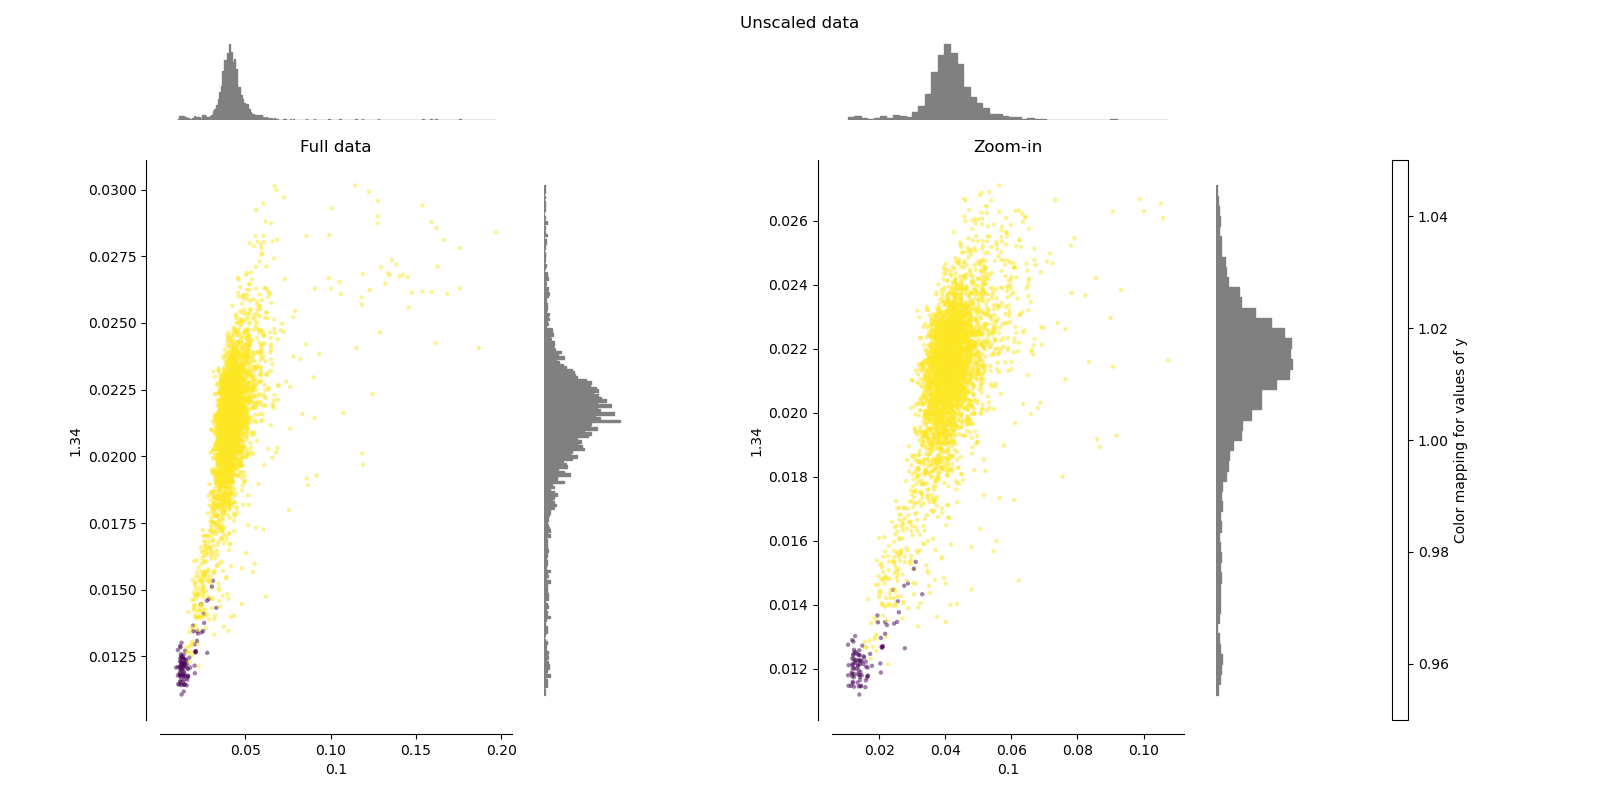

In [33]:
### training scaling comparison
%matplotlib widget

import matplotlib as mpl
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt

from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    StandardScaler,
    minmax_scale,
)

### Specs - get X and y
features = [qvalue1 , qvalue3]
X = X_full[:,:2]
y = y_full

#### computation
distributions = [
    ("Unscaled data",                         X                                ),
    ("Data after standard scaling",           StandardScaler().fit_transform(X)),
    ("Data after min-max scaling",            MinMaxScaler().fit_transform(X)  ),
    ("Data after max-abs scaling",            MaxAbsScaler().fit_transform(X)  ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)    ),
]



def create_axes(title, figsize=(16, 8)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width          = 0.1, 0.22
    bottom, height       = 0.1, 0.7
    bottom_h             = height + 0.15
    left_h               = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx   = [left, bottom_h, width, 0.1]
    rect_histy   = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx   = plt.axes(rect_histx)
    ax_histy   = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left   = width + left  + 0.2
    left_h = left  + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx   = [left, bottom_h, width, 0.1]
    rect_histy   = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom   = plt.axes(rect_histx)
    ax_histy_zoom   = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width   = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar   = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=10, lw=0, c=y)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins = 200,
        x0_label   = features[0],
        x1_label   = features[1],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins = 50,
        x0_label   = features[0],
        x1_label   = features[1],
        title="Zoom-in",
    )

    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        values=y,
        orientation="vertical",
        label="Color mapping for values of y",
    )

make_plot(0)

In [40]:
### writing to file
%matplotlib widget

### 1971 EC - ROI-1
y_test = []
for frames in [np.arange(2190, 2205), np.arange(2308, 2329), np.arange(2429, 2452), np.arange(2549, 2576), np.arange(2670, 2697), np.arange(2795, 2817), np.arange(2918, 2938), np.arange(3040, 3061), np.arange(3158, 3187), np.arange(3277, 3312), np.arange(3398, 3434), np.arange(3519, 3557), np.arange(3641, 3679),] :
    for frame in frames:
        y_test.append(frame)

y_test = np.array(y_test)
print(y_test)

[2190 2191 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201 2202 2203
 2204 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318 2319 2320
 2321 2322 2323 2324 2325 2326 2327 2328 2429 2430 2431 2432 2433 2434
 2435 2436 2437 2438 2439 2440 2441 2442 2443 2444 2445 2446 2447 2448
 2449 2450 2451 2549 2550 2551 2552 2553 2554 2555 2556 2557 2558 2559
 2560 2561 2562 2563 2564 2565 2566 2567 2568 2569 2570 2571 2572 2573
 2574 2575 2670 2671 2672 2673 2674 2675 2676 2677 2678 2679 2680 2681
 2682 2683 2684 2685 2686 2687 2688 2689 2690 2691 2692 2693 2694 2695
 2696 2795 2796 2797 2798 2799 2800 2801 2802 2803 2804 2805 2806 2807
 2808 2809 2810 2811 2812 2813 2814 2815 2816 2918 2919 2920 2921 2922
 2923 2924 2925 2926 2927 2928 2929 2930 2931 2932 2933 2934 2935 2936
 2937 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052
 3053 3054 3055 3056 3057 3058 3059 3060 3158 3159 3160 3161 3162 3163
 3164 3165 3166 3167 3168 3169 3170 3171 3172 3173 3174 3175 3176 3177
 3178 

In [77]:
### read dataframe file

pd.set_option('display.max_rows', 500    )
pd.set_option('display.max_columns', 500 )
pd.set_option('display.width', 1000      )

heatmap_labels_file = "/Users/bashit.a/Documents/Alzheimer/heatmap_labels.csv"
df                  = pd.read_csv(heatmap_labels_file)
df                  = df.astype({'frame':str})
df.at[0,'frame']    = labels
print(df)

                         file frame                                             merged  label         dropdown-name           lesion scan_loc disease  comments
0  1971_EC-roi1_0_0_masked.h5  3678  [3.54376427e+03 1.21912839e+03 4.17516027e+02 ...    NaN  Mar-2023-Sample#1971  Neuratic_plaque       EC    ADNC       NaN


In [78]:
### writing to csv
df.to_csv(heatmap_labels_file, index=False)

                         file                                              frame                                             merged  label         dropdown-name           lesion scan_loc disease  comments
0  1971_EC-roi1_0_0_masked.h5  [2190, 2191, 2192, 2193, 2194, 2195, 2196, 219...  [3.54376427e+03 1.21912839e+03 4.17516027e+02 ...    NaN  Mar-2023-Sample#1971  Neuratic_plaque       EC    ADNC       NaN


number of estimated clusters : 6


Text(0.5, 0.98, '1971_EC-roi1_0_0_masked.h5')

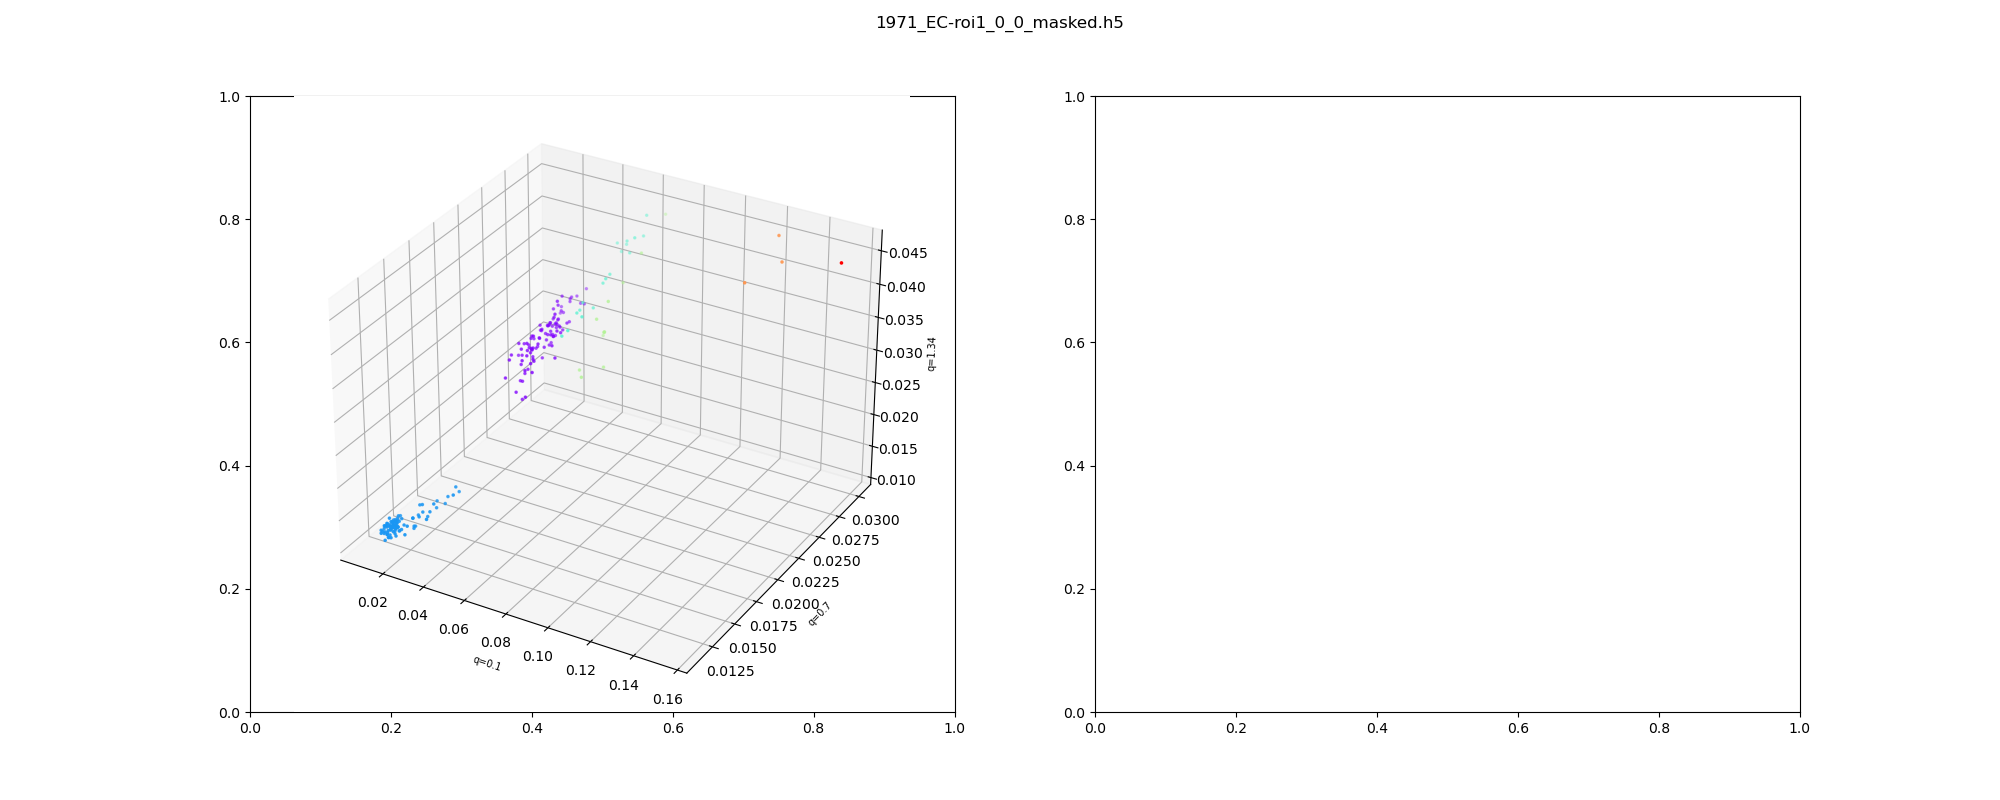

In [45]:
### Mean Shift Algorithm
%matplotlib widget

from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X_train, quantile=0.3, n_samples=None)   # The following bandwidth can be automatically detected using


ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
yhat = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(yhat)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

f, axs    = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 8 ))
axs[0]    = f.add_subplot(1, 2, 1, projection='3d')

# colors = ["#dede00", "#377eb8", "#f781bf"]
# markers = ["x", "o", "^"]

# for k, col in zip(range(n_clusters_), colors):
#     my_members = labels == k
#     cluster_center = cluster_centers[k]
#     axs[0].scatter3D(X_train[my_members, 0], X_train[my_members, 1], markers[k], color=col)
#     plt.scatter3D(
#         cluster_center[0],
#         cluster_center[1],
#         markers[k],
#         markerfacecolor=col,
#         markeredgecolor="k",
#         markersize=14,
#     )
# plt.title("Estimated number of clusters: %d" % n_clusters_)
# plt.show()




axs[0].scatter3D (xs = X_train[:, 0], ys= X_train[:, 1 ], zs= X_train[:, 2]  , c =yhat, marker ='.', s=10, cmap="rainbow")
axs[0].set_xlabel(f'q={qvalue1 }',  fontsize=7)
axs[0].set_ylabel(f'q={qvalue2 }',  fontsize=7)
axs[0].set_zlabel(f'q={qvalue3 }',  fontsize=7)



plt.suptitle(file)

Text(0.5, 0.98, '1971_EC-roi1_0_0_masked.h5')

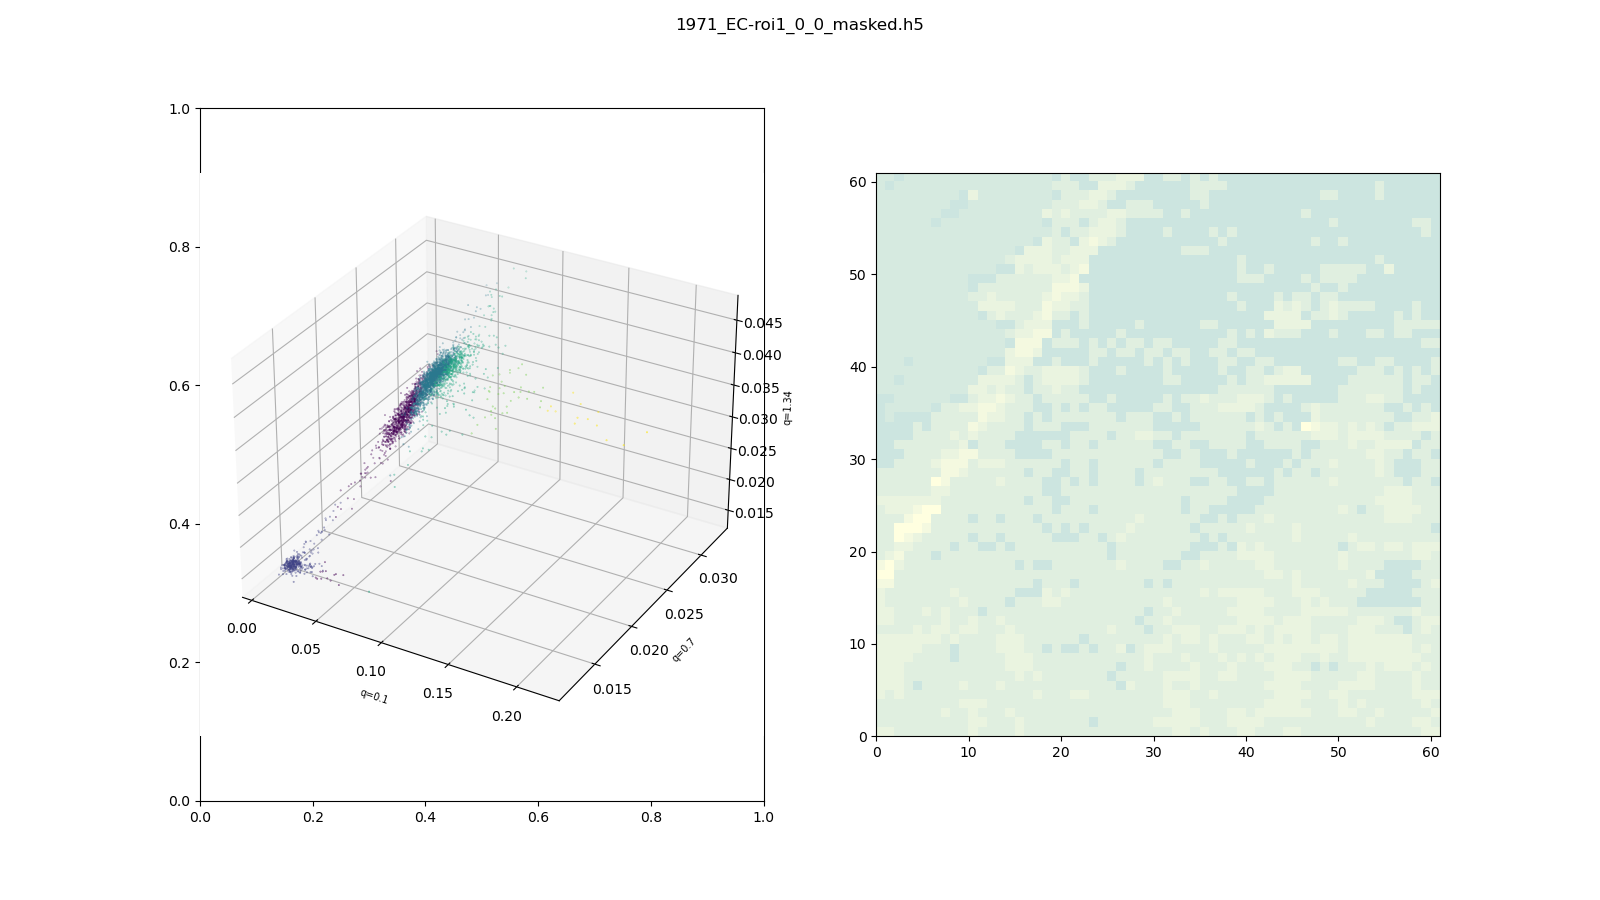

In [36]:
### Mean shift classifier outcome

%matplotlib widget

### specs - import file
file      = '1971_EC-roi1_0_0_masked.h5'    # '1898_EC-roi0_0_0_masked_intp.h5'   '1898_V1-roi0_0_0_masked.h5'   '1898_V2-roi1_0_0_masked_intp.h5'
directory = '/Volumes/HDD/BNL-Data/Mar-2023/1971/'
Width, Height = width_height(file, directory = directory)
Iq        = read_Iq(file, scattering="merged", directory = directory)

### computation
yhat = ms.predict( Iq[:, [ qgrid_to_indices(qgrid2, qvalue1), qgrid_to_indices(qgrid2, qvalue2), qgrid_to_indices(qgrid2, qvalue3)] ] )   # Iq[:, [ qgrid_to_indices(qgrid2, qvalue1), qgrid_to_indices(qgrid2, qvalue2), qgrid_to_indices(qgrid2, qvalue3)] ]


### Visualize labeled data
fig = px.scatter_3d(x = Iq[:, qgrid_to_indices(qgrid2, qvalue1)], y= Iq[:, qgrid_to_indices(qgrid2, qvalue2) ], z= Iq[:, qgrid_to_indices(qgrid2, qvalue3)]  ,
                    color=yhat, symbol=yhat,  hover_name= np.arange(0,Width*Height),  template="plotly_white")  # x = Iq[:, qgrid_to_indices(qgrid2, qvalue1)], y= Iq[:, qgrid_to_indices(qgrid2, qvalue2) ], z= Iq[:, qgrid_to_indices(qgrid2, qvalue3)]   hover_name= None,  symbol=yhat,  symbol=yhat, hover_name= np.arange(0,Width*Height),
fig.update_layout(
    autosize=True,
    width=1400,
    height=800,
    scene=dict(
        xaxis_title=f'q={qvalue1 }',
        yaxis_title=f'q={qvalue2 }',
        zaxis_title=f'q={qvalue3 }',
    )
)

### plot figure
f, axs    = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 9 ))
axs[0]  = f.add_subplot(1, 2, 1, projection='3d')
axs[0].scatter3D (xs = Iq[:, qgrid_to_indices(qgrid2, qvalue1)], ys= Iq[:, qgrid_to_indices(qgrid2, qvalue2) ], zs= Iq[:, qgrid_to_indices(qgrid2, qvalue3)]  , c =yhat, marker ='.', s=0.5)
axs[0].set_xlabel(f'q={qvalue1 }',  fontsize=7)
axs[0].set_ylabel(f'q={qvalue2 }',  fontsize=7)
axs[0].set_zlabel(f'q={qvalue3 }',  fontsize=7)


frame_cor = snaking(Width, Height)                   # snaking indices for heat map
numrows, numcols = Height, Width                     # format_coord function requires this global variables
def format_coord(x, y):
    col = int(x)                                     # truncate x values
    row = int(y)                                     # truncate y values
    if 0 <= col < numcols and 0 <= row < numrows:
        z = np.flipud(frame_cor)[row, col]           # flipping to get correct value of z     
        return 'x=%1.2f, y=%1.2f, FRAME=%d' % (x, y, z)
    else:
        return 'x=%1.2f, y=%1.2f' % (x, y)           # outside the plotting range, no need



axs[1].format_coord = format_coord
img_orig            = snaking(Width, Height, X=yhat)
axs[1].imshow(img_orig, cmap='summer' , interpolation = 'none', origin='upper', extent=[0,Width,0,Height], aspect='equal', norm=None, alpha=0.2)


plt.suptitle(file)

False Negative Frames: [2190 2191 2192 2193 2194 2198 2199 2200 2201 2202 2203 2308 2309 2310
 2311 2312 2313 2314 2315 2316 2317 2318 2319 2321 2322 2323 2324 2325
 2326 2327 2328 2429 2430 2431 2432 2433 2434 2435 2436 2437 2438 2439
 2440 2441 2442 2444 2445 2446 2447 2448 2449 2450 2451 2549 2550 2551
 2552 2553 2554 2555 2556 2557 2558 2559 2560 2561 2562 2563 2564 2565
 2566 2567 2568 2569 2570 2571 2572 2573 2574 2575 2670 2671 2672 2673
 2674 2675 2676 2677 2678 2679 2680 2681 2682 2683 2684 2685 2686 2687
 2688 2689 2690 2691 2692 2693 2694 2695 2696 2795 2796 2797 2798 2799
 2800 2801 2802 2803 2804 2805 2806 2807 2808 2809 2810 2811 2812 2813
 2814 2815 2816 2918 2919 2920 2921 2922 2923 2924 2925 2926 2927 2928
 2929 2930 2931 2932 2933 2934 2935 2936 2937 3040 3041 3042 3043 3044
 3045 3046 3047 3048 3049 3050 3051 3052 3053 3054 3055 3056 3057 3058
 3059 3060 3158 3159 3160 3161 3162 3163 3164 3165 3166 3167 3168 3169
 3170 3171 3172 3173 3174 3175 3176 3177 3178 3179 318

Text(0.5, 0.98, '1971_EC-roi1_0_0_masked.h5')

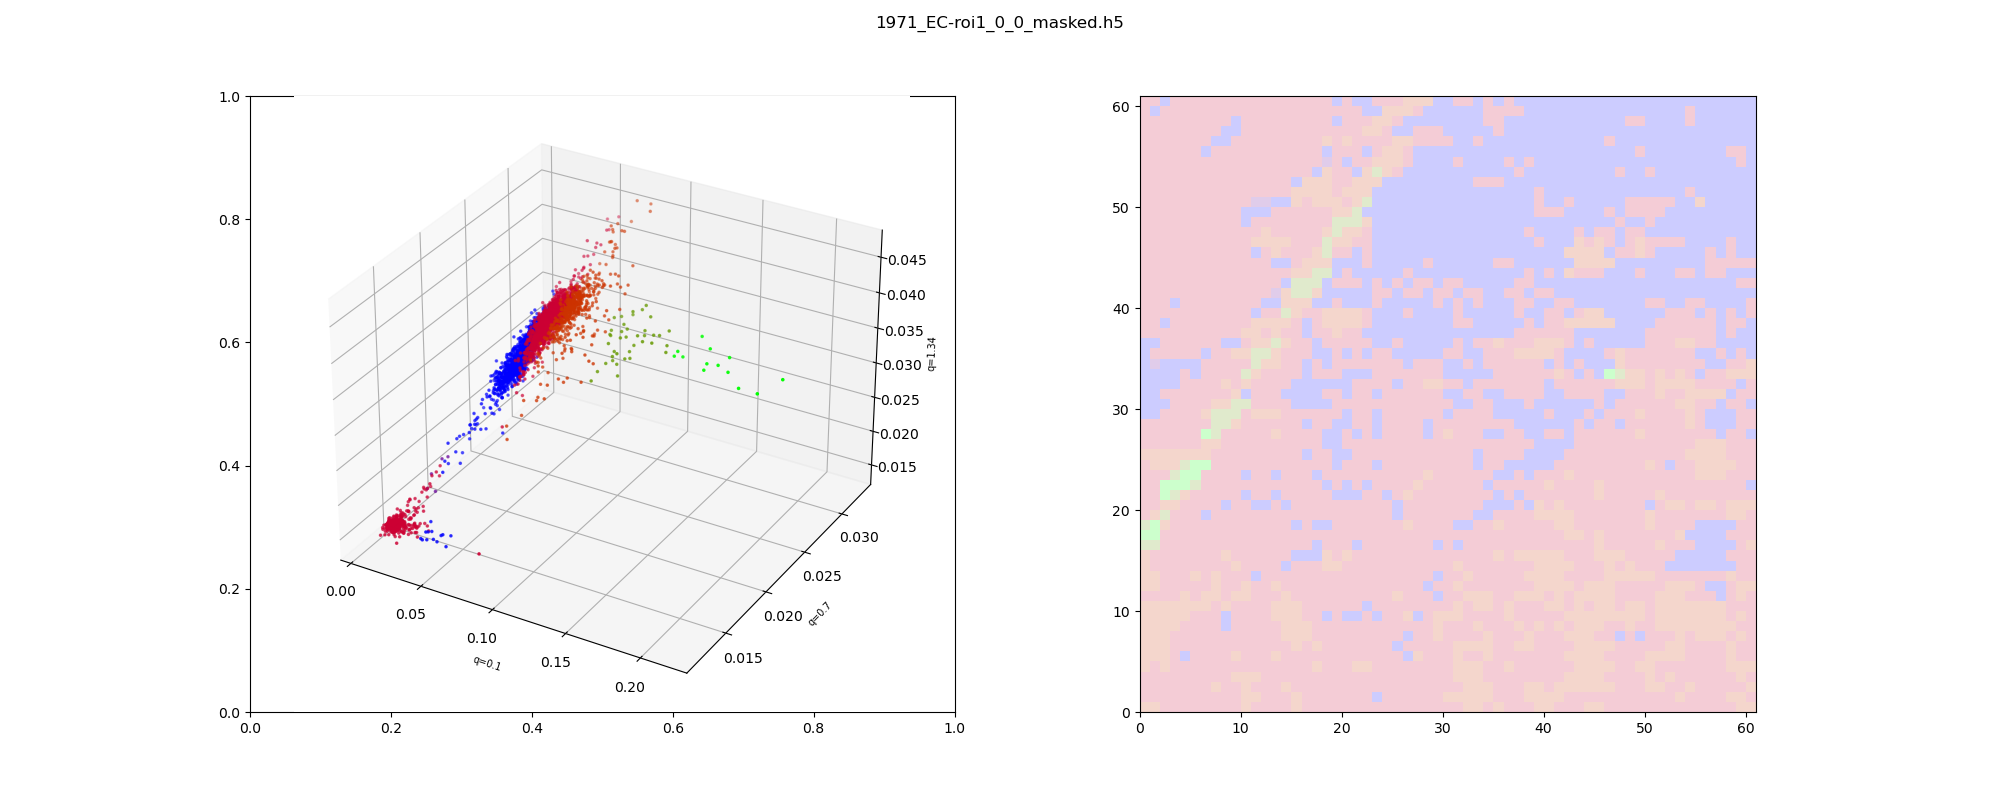

In [37]:
%matplotlib widget

### 1971 EC - ROI-1
y_true = []
for frames in [np.arange(2190, 2205), np.arange(2308, 2329), np.arange(2429, 2452), np.arange(2549, 2576), np.arange(2670, 2697), np.arange(2795, 2817), np.arange(2918, 2938), np.arange(3040, 3061), np.arange(3158, 3187), np.arange(3277, 3312), np.arange(3398, 3434), np.arange(3519, 3557), np.arange(3641, 3679),] :
    for frame in frames:
        y_true.append(frame)

y_true = np.array(y_true)
yhat_frames = np.array( np.where(yhat == 0)[0].tolist() )

TP = np.intersect1d(y_true , yhat_frames)
FN = np.setdiff1d ( y_true,  TP )   #
print('False Negative Frames:', FN )

accuracy = len(TP)/(len(TP)+len(FN))
print(f'accuracy = : {accuracy*100} %')

yhat[FN] = 2

### plot figure
f, axs    = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 8 ))
axs[0]  = f.add_subplot(1, 2, 1, projection='3d')
axs[0].scatter3D (xs = Iq[:, qgrid_to_indices(qgrid2, qvalue1)], ys= Iq[:, qgrid_to_indices(qgrid2, qvalue2) ], zs= Iq[:, qgrid_to_indices(qgrid2, qvalue3)]  , c =yhat, marker ='.', s=10, cmap="brg")
axs[0].set_xlabel(f'q={qvalue1 }',  fontsize=7)
axs[0].set_ylabel(f'q={qvalue2 }',  fontsize=7)
axs[0].set_zlabel(f'q={qvalue3 }',  fontsize=7)

frame_cor = snaking(Width, Height)                   # snaking indices for heat map,
numrows, numcols = Height, Width                     # format_coord function requires this global variables
def format_coord(x, y):
    col = int(x)                                     # truncate x values
    row = int(y)                                     # truncate y values
    if 0 <= col < numcols and 0 <= row < numrows:
        z = np.flipud(frame_cor)[row, col]           # flipping to get correct value of z     
        return 'x=%1.2f, y=%1.2f, FRAME=%d' % (x, y, z)
    else:
        return 'x=%1.2f, y=%1.2f' % (x, y)           # outside the plotting range, no need


axs[1].format_coord = format_coord
img_orig            = snaking(Width, Height, X=yhat)
axs[1].imshow(img_orig, cmap='brg' , interpolation = 'none', origin='upper', extent=[0,Width,0,Height], aspect='equal', norm=None, alpha=0.2)

plt.suptitle(file)

In [5]:
### Import TensorFlow and other libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [6]:
# Load data data
qvalue1 = 0.7
qvalue2 = 1.46


# split dataset
train_data, test_data, train_labels, test_labels = train_test_split(
    Iq_train[:, qgrid_to_indices(qgrid2, qvalue1):qgrid_to_indices(qgrid2, qvalue2)] , y_train, test_size=0.2, random_state=21
)
train_data = interpolate_missing(train_data)[1]
test_data  = interpolate_missing(test_data)[1]
n_features = len(train_data[0])


# Normalize the data to [0,1].
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

# You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as 1. Separate the normal rhythms from the abnormal rhythms.
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

# Plot a normal ECG.
plt.figure()
plt.grid()
plt.plot(np.arange(len(normal_train_data[0])), normal_train_data[0])
plt.title("A regual X-ray")
plt.show()

# Plot an anomalous ECG.
plt.figure()
plt.grid()
plt.plot(np.arange(len(anomalous_train_data[0])), anomalous_train_data[0])
plt.title("An Bkg X-ray")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
# Build the model
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Dense(32, activation="relu"),
          layers.Dense(16, activation="relu"),
          layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
          layers.Dense(16, activation="relu"),
          layers.Dense(32, activation="relu"),
          layers.Dense(128, activation="relu"),  
          layers.Dense(n_features, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()
autoencoder.compile(optimizer='adam', loss='mae')

history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=200, 
          batch_size=128,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/200
1/1 [==============================] - 0s 288ms/step - loss: 0.2491 - val_loss: 0.3085
Epoch 2/200
1/1 [==============================] - 0s 19ms/step - loss: 0.2479 - val_loss: 0.3074
Epoch 3/200
1/1 [==============================] - 0s 20ms/step - loss: 0.2465 - val_loss: 0.3061
Epoch 4/200
1/1 [==============================] - 0s 21ms/step - loss: 0.2449 - val_loss: 0.3046
Epoch 5/200
1/1 [==============================] - 0s 20ms/step - loss: 0.2431 - val_loss: 0.3029
Epoch 6/200
1/1 [==============================] - 0s 21ms/step - loss: 0.2410 - val_loss: 0.3010
Epoch 7/200
1/1 [==============================] - 0s 16ms/step - loss: 0.2387 - val_loss: 0.2988
Epoch 8/200
1/1 [==============================] - 0s 22ms/step - loss: 0.2360 - val_loss: 0.2964
Epoch 9/200
1/1 [==============================] - 0s 22ms/step - loss: 0.2329 - val_loss: 0.2935
Epoch 10/200
1/1 [==============================] - 0s 23ms/step - loss: 0.2294 - val_loss: 0.2903


In [8]:
# plot training
plt.figure()
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()


# plot reconstruction error for normal training data
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.figure()
plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(n_features), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()


# plot reconstruction error for abnormal training data
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.figure()
plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(n_features), decoded_data[0], anomalous_test_data[0], color='lightcoral') 
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

# Detect anomalies
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.figure()
plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

# Choose a threshold value that is one standard deviations above the mean.
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


# examine the reconstruction error for the anomalous examples 
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.figure()
plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))
    print("Precision = {}".format(precision_score(labels, predictions)))
    print("Recall = {}".format(recall_score(labels, predictions)))

preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Threshold:  0.123992234


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Accuracy = 0.9111111111111111
Precision = 1.0
Recall = 0.8666666666666667


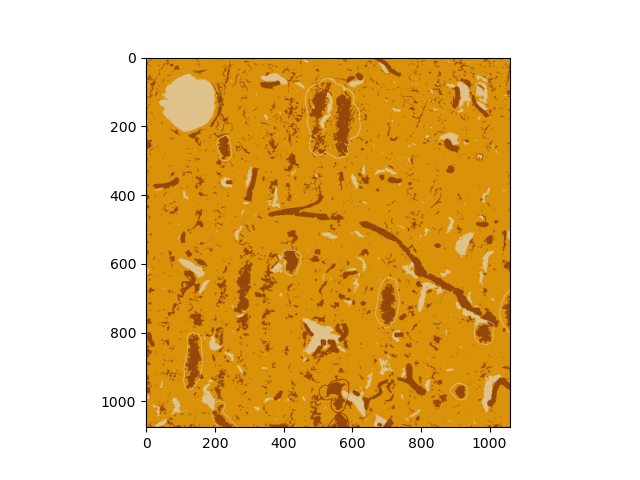

In [358]:
### Silver-stained image classification using KNN
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import cv2
 
k = 3

# Read in the image
image = cv2.imread("/Volumes/HDD/BNL-Data/Mar-2023/1948/silver_staining/1948_EC-roi1_0_0_label.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

   
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)
  
#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.figure()
plt.cla()
plt.imshow(segmented_image)

Text(0.5, 0, 'PC3')

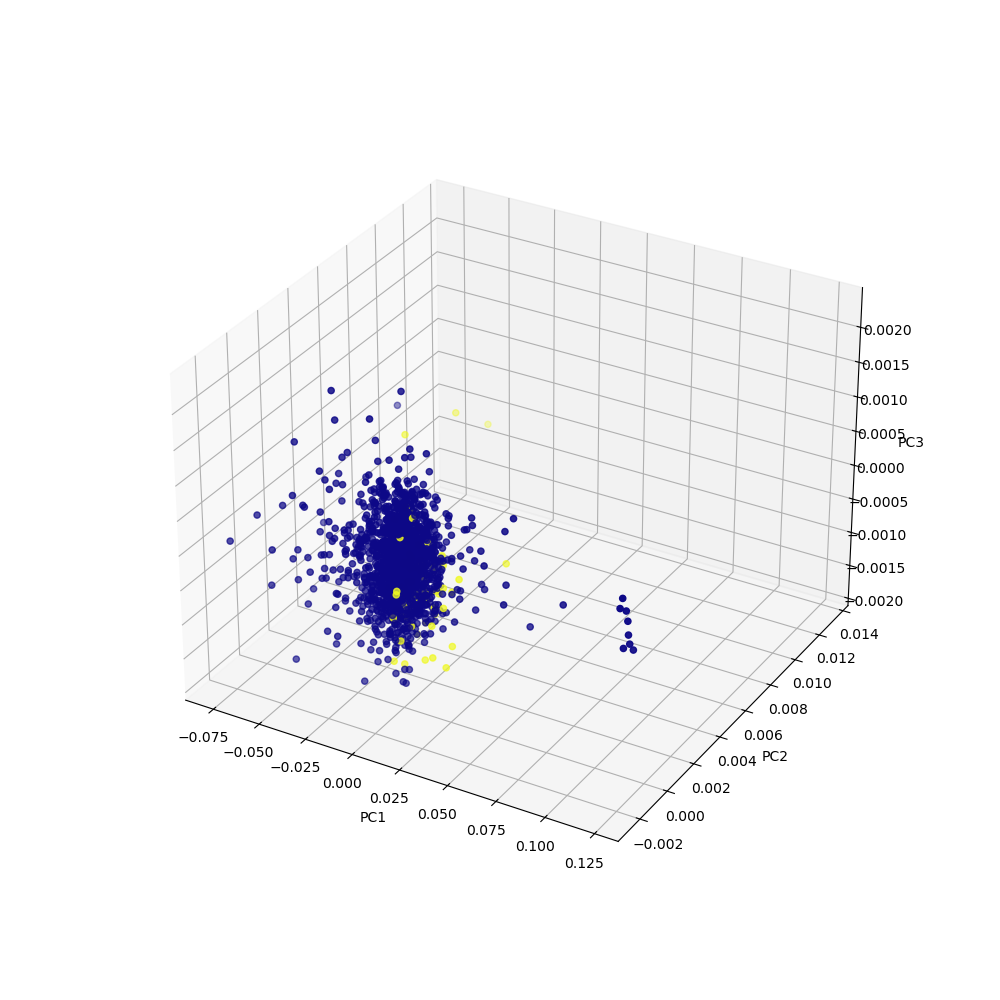

In [12]:
### PCA on Input data
thr = 0.87

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(out.Iq)
x = pca.transform(out.Iq)
y = (out.diff_patterns > thr)
x.shape, y.shape, pca.components_.shape

fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='3d') # choose projection 3d for creating a 3d graph
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=y,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)